# Blend360
## Pre-Onboarding: EDA Project
### Submittied by: Nitin Yadav_Avengers
**Problem Statement**

Perform exploratory data analysis on the retail sales data, understand which products and services, regions and cities, categories and customer segments company should target or avoid or should focus on to increase its profitability

In [80]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
# Importing csv file and creating a dataframe
data = pd.read_csv("PreOnboarding EDA - Retail store data.csv",encoding='latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Removing variables not useful for analysis

In [215]:
# List of all varibales in the data frame
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [216]:
# Choosing only important variables
df = data[["Ship Mode", "Segment", "Country", "City", "State", "Region", "Category", "Sub-Category","Sales", "Quantity", "Discount", "Profit"]]

## Exploring Data

In [219]:
# Shape of data frame
df.shape

(9994, 12)

There are 9994 rows and 12 columns in the data set. So, there are 9994 samples and 12 variables

In [218]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

These are variable names. Here, Profit is the target variable

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


Out of the 12 variables, 8 are categorical and 4 are numerical variables

## Checking for missing values

In [116]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no missing values in any varibale

## Checking for correlations between variables

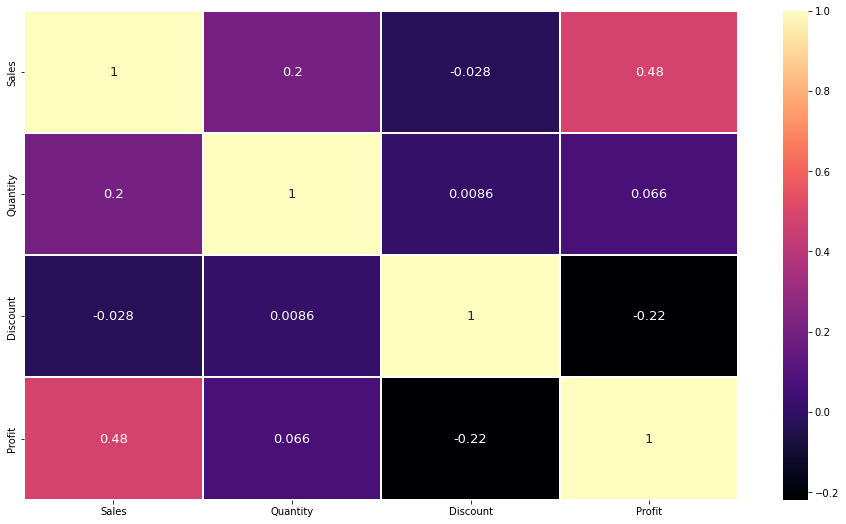

In [259]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap ='magma',linewidth = 0.30, annot = True, annot_kws={"fontsize":13})
plt.savefig("cor.png")
plt.show()

Above heatmap shows that, Discount and Sales feature are very much correlated with target variable Profit. Discount has inverse relationship with Profit, which means Profit decreases if Discount increases.

## Individual feature exploration
### <u>Categorical Variables</u>
### 1) Exploring City feature

In [119]:
# Number of cities in which sales operations operate
cities = df['City'].unique()
len(cities)

531

So, there are 531 cities in which sales operations operate

*Note: Every row represents a sales operations*

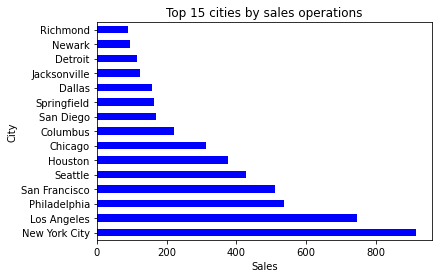

In [246]:
# City that has maximum sales operations
df.City.value_counts()[:15].plot(kind = 'barh', color = 'b')
plt.title('Top 15 cities by sales operations')
plt.xlabel("Sales")
plt.ylabel("City")
plt.show()

New York City has maximum sales operations

In [165]:
# How many cities are generating profit & loss respectively

# Initializing lists
positive_cities = []
negative_cities = []
profit_of_cities = []
loss_of_cities = []

# Looping over every cities
for city in df['City'].unique():
    # Checking if current city is generating loss
    if df['Profit'][df['City'] == city].mean() <= 0:
        negative_cities.append(city)
        loss_of_cities.append(df['Profit'][df['City'] == city].mean())
    # Checking if current city is generating profit
    else:
        positive_cities.append(city)
        profit_of_cities.append(df['Profit'][df['City'] == city].mean())       

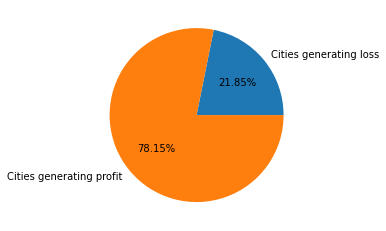

In [245]:
plt.pie([len(negative_cities), len(positive_cities)], labels = ['Cities generating loss', 'Cities generating profit'], autopct = '%0.2f%%')
plt.show()

According to above pie chart, 78.15% of total cities are generating profit and 21.85% are generating loss

In [167]:
len(negative_cities)

116

116 cities are generating loss

In [168]:
len(positive_cities)

415

415 cities are generating profit

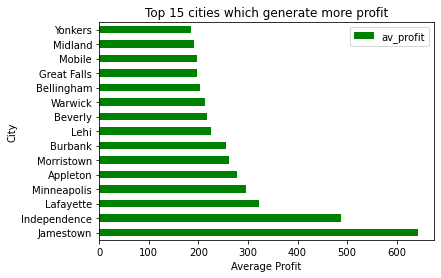

In [243]:
# City that generates maximum profit
df2 = pd.DataFrame(list(zip(positive_cities, profit_of_cities)), columns = ['city_name', 'av_profit']).sort_values(by = 'av_profit', ascending = False)[:15]
df2.plot(kind = 'barh', x = "city_name", y = "av_profit", color = 'g')
plt.title('Top 15 cities which generate more profit')
plt.xlabel("Average Profit")
plt.ylabel("City")
plt.show()

City named Jamestown is generating maximum profit

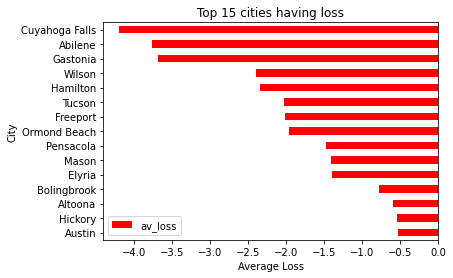

In [244]:
# City that generates maximum loss
df3 = pd.DataFrame(list(zip(negative_cities, loss_of_cities)),columns = ['city_name', 'av_loss']).sort_values(by = 'av_loss', ascending = False)[:15]
df3.plot(kind ='barh',x = "city_name",y = "av_loss", color = 'r')
plt.title('Top 15 cities having loss')
plt.xlabel("Average Loss")
plt.ylabel("City")
plt.show()

City named Cuyahoga Falls is generating maximum loss

### 2) Exploring State feature

In [171]:
# Number of states in which sales operations operate
states=df['State'].unique()
len(states)

49

So, there are 49 states in which sales operations operate

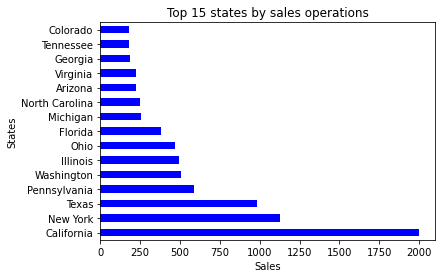

In [172]:
# State that has maximum sales operations
df.State.value_counts()[:15].plot(kind='barh', color = 'b')
plt.title('Top 15 states by sales operations')
plt.xlabel("Sales")
plt.ylabel("States")
plt.show()

California has maximum sales operations

In [173]:
# How many states are generating profit & loss respectively

# Initializing lists
postive_states=[]
negtive_states=[]
profit_of_states=[]
loss_of_states=[]

# Looping over every states
for state in df['State'].unique():
    # Checking if current state is generating loss
    if df['Profit'][df['State'] == state].mean() <= 0:
        negtive_states.append(state)
        loss_of_states.append(df['Profit'][df['State'] == state].mean())
    # Checking if current state is generating profit
    else:
        postive_states.append(state)
        profit_of_states.append(df['Profit'][df['State'] == state].mean())       

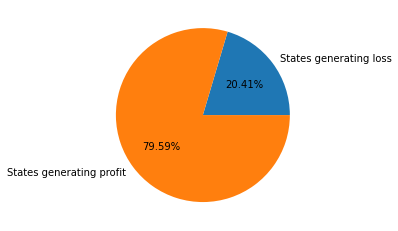

In [175]:
plt.pie([len(negative_states),len(positive_states)],labels=['States generating loss','States generating profit'],autopct='%0.2f%%')
plt.show()

According to above pie chart, 79.59% of total states are generating profit and 20.41% are generating loss

In [176]:
len(negative_states)

10

10 states are generating loss

In [37]:
len(positive_states)

39

39 states are generating profit

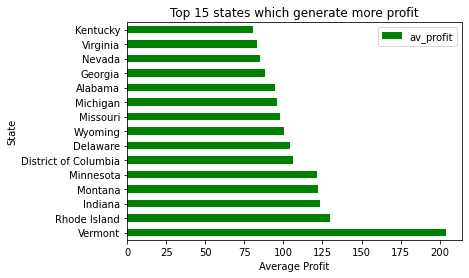

In [182]:
# State that generates maximum profit
df4 = pd.DataFrame(list(zip(positive_states, profit_of_states)),columns = ['state_name', 'av_profit']).sort_values(by = 'av_profit', ascending = False)[:15]
df4.plot(kind = 'barh',x = "state_name",y = "av_profit", color = 'g')
plt.title('Top 15 states which generate more profit')
plt.xlabel("Average Profit")
plt.ylabel("State")
plt.show()

State named Vermont is generating maximum profit

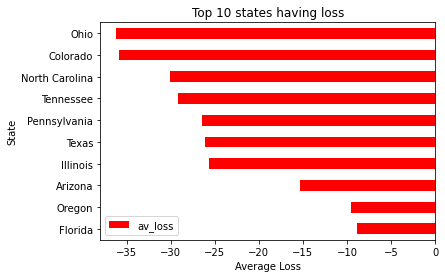

In [248]:
# State that generates maximum loss
df5 = pd.DataFrame(list(zip(negative_states, loss_of_states)),columns = ['state_name', 'av_loss']).sort_values(by = 'av_loss', ascending = False)[:10]
df5.plot(kind = 'barh',x = "state_name",y = "av_loss", color = 'r')
plt.title('Top 10 states having loss')
plt.xlabel("Average Loss")
plt.ylabel("State")
plt.show()

State named Ohio is generating maximum loss

### 3) Exploring Country feature

In [46]:
df['Country'].unique()

array(['United States'], dtype=object)

There is only one and unique country United States which involved in sales operations

### 4) Exploring Category feature

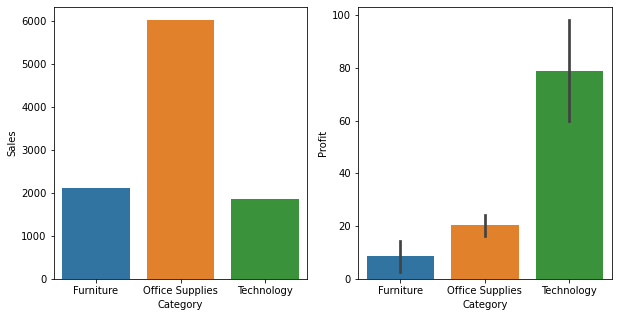

In [202]:
plt.figure(figsize = (10, 5))

# Top Category with respect to investment (sales operations)
plt.subplot(1, 2, 1)
sns.countplot(x = 'Category', data = df)
plt.xlabel("Category")
plt.ylabel("Sales")

# Top Category with respect to generating more profit
plt.subplot(1, 2, 2)
sns.barplot(x = 'Category',y = 'Profit',data = df)
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

* Left bar chart shows that, Office Supplies Category has maximum sales operations
* Right bar chart shows that, Technology Category generates maximum profit

  Conclusion: Technology items are less sold, but more profitable

### 5) Exploring Ship Mode feature

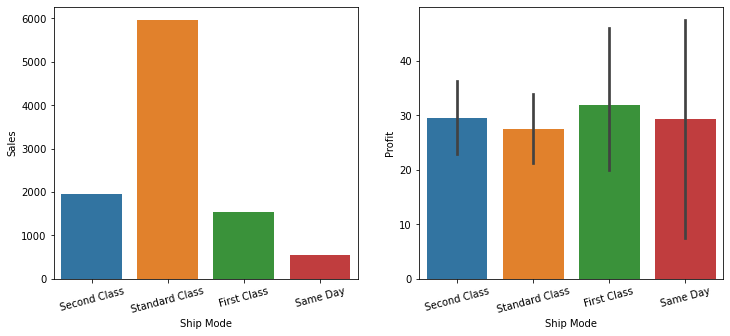

In [203]:
plt.figure(figsize = (12, 5))

# Top Ship Mode with respect to investment (sales operations)
plt.subplot(1, 2, 1)
sns.countplot(x = 'Ship Mode',data = df)
plt.xticks(rotation = 15)
plt.xlabel("Ship Mode")
plt.ylabel("Sales")

# Top Ship Mode with respect to generating more profit
plt.subplot(1, 2, 2)
sns.barplot(x = 'Ship Mode',y = 'Profit',data = df)
plt.xticks(rotation = 15)
plt.xlabel("Ship Mode")
plt.ylabel("Profit")
plt.show()

* Left bar chart shows that, Standard Class has maximum sales operations
* Right bar chart shows that, each class generates almost same profit. So, Ship Mode do not disturb Profit

### 6) Exploring Segment feature

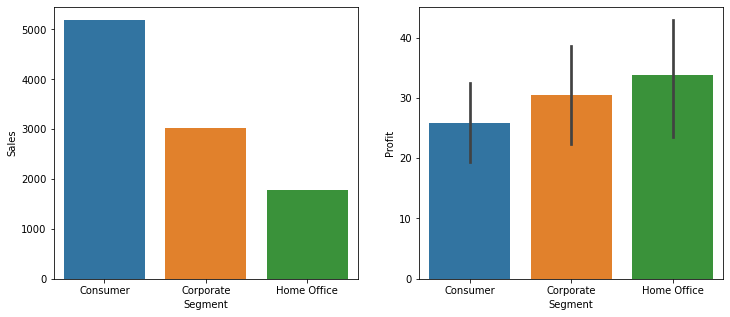

In [204]:
plt.figure(figsize = (12, 5))

# Top Segment with respect to investment (sales operations)
plt.subplot(1, 2, 1)
sns.countplot(x = 'Segment',data = df)
plt.xlabel("Segment")
plt.ylabel("Sales")

# Top Segment with respect to generating more profit
plt.subplot(1, 2, 2)
sns.barplot(x = 'Segment',y = 'Profit',data = df)
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.show()

* Here a reverse relation is observed as shown in above two bar charts
* Left bar chart shows that, Consumer Segment has maximum sales operations
* Right bar chart shows that Home Office Segment generates maximum profit

  Conclusion: Corporate Segment can be used as a trade-off

### 7) Exploring Region feature

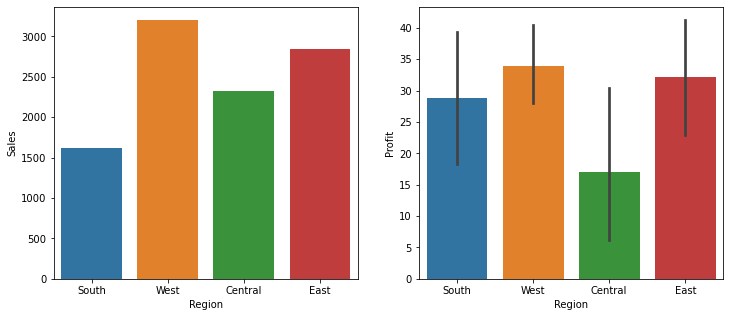

In [206]:
plt.figure(figsize = (12, 5))

# Top Region with respect to generating more investment (sales operations)
plt.subplot(1, 2, 1)
sns.countplot(x = 'Region',data = df)
plt.xlabel("Region")
plt.ylabel("Sales")

# Top Region with respect to generating more profit
plt.subplot(1, 2, 2)
sns.barplot(x = 'Region',y = 'Profit',data = df)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()

* Left bar chart shows that, West Region has maximum sales operations
* Right bar chart shows that, West Region generates more profit and Central Region generate very less profit

### 8) Exploring Sub-Category feature

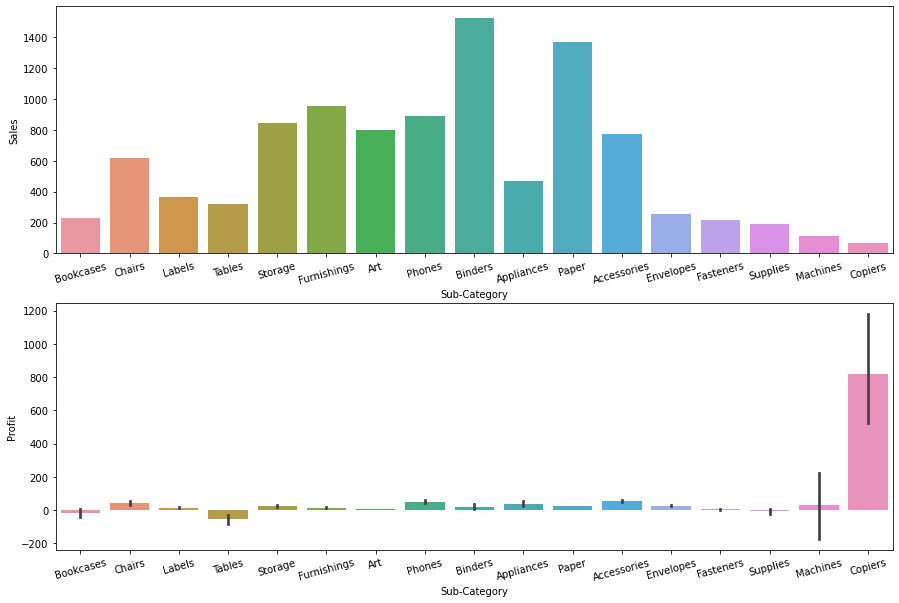

In [250]:
plt.figure(figsize = (15, 10))

# Top Sub-Category with respect to generating more investment (sales operations)
plt.subplot(2, 1, 1)
sns.countplot(x = 'Sub-Category',data = df)
plt.xticks(rotation = 15)
plt.xlabel("Sub-Category")
plt.ylabel("Sales")

# Top Sub-Category with respect to generating more profit
plt.subplot(2, 1, 2)
sns.barplot(x = 'Sub-Category',y = 'Profit',data = df)
plt.xticks(rotation = 15)
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.show()

* Upper bar chart shows that, Binders Sub-Category has maximum sales operations
* Lower bar chart shows that, Copiers Sub-Category generates more profit, Tables Sub-Category and Machines Sub-Category generates loss and all the remaining Sub-Category generates very less profit

### <u>Numerical Variables</u>
### 1) Exploring Quantity feature

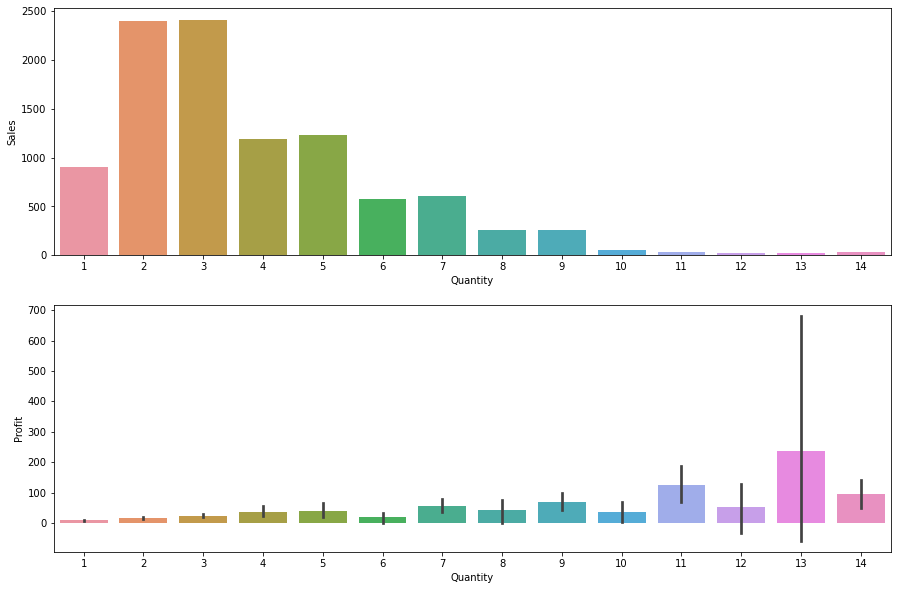

In [222]:
plt.figure(figsize = (15, 10))

# Top Quantity with respect to generating more investment (sales operations)
plt.subplot(2, 1, 1)
sns.countplot(x = 'Quantity',data = df)
plt.xlabel("Quantity")
plt.ylabel("Sales")

# Top Quantity with respect to generating more profit
plt.subplot(2, 1, 2)
sns.barplot(x = 'Quantity',y = 'Profit',data = df)
plt.xlabel("Quantity")
plt.ylabel("Profit")
plt.show()

* Upper bar chart shows that, 2 and 3 Quantity has maximum sales operations
* Lower bar chart shows that, 11 and 13 Quantity generates more profit

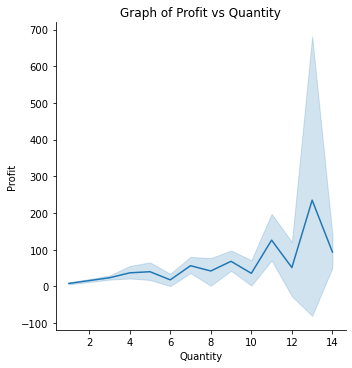

In [231]:
# Checking effect of increasing Quantity on Profit
sns.relplot(x = "Quantity",y = "Profit",data = df,kind = 'line')
plt.title('Graph of Profit vs Quantity')
plt.xlabel("Quantity")
plt.ylabel("Profit")
plt.show()

Above graph shows that if Quantity of things is increasing than normally Profit is also increasing. So, there is a positive relationship between Quantity and Profit, but ups and downs are also there

### 2) Exploring Discount feature

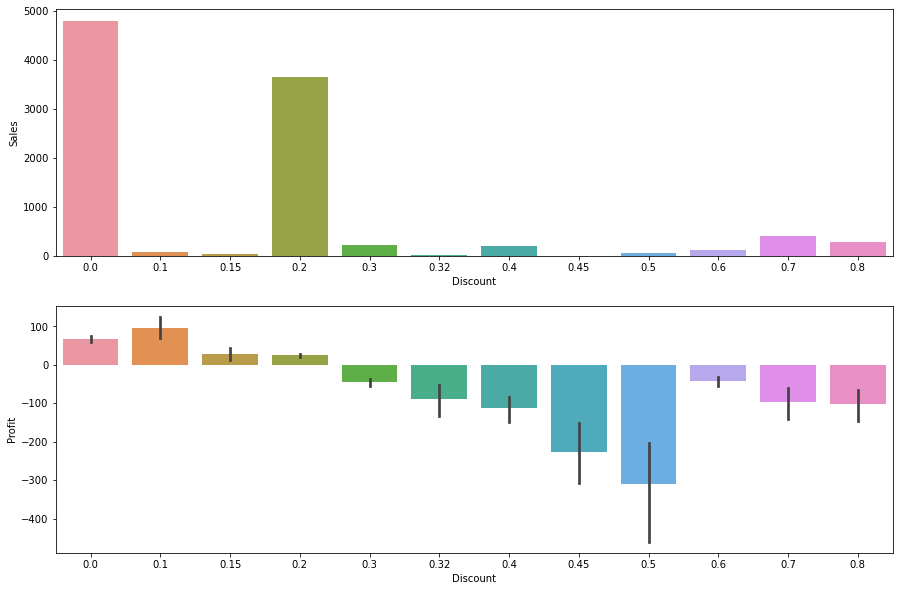

In [211]:
plt.figure(figsize=(15,10))

# Top Discount with respect to generating more investment (sales operations)
plt.subplot(2,1, 1)
sns.countplot(x='Discount',data=df)
plt.xlabel("Discount")
plt.ylabel("Sales")


# Top Discount with respect to generating more profit
plt.subplot(2,1, 2)
sns.barplot(x='Discount',y='Profit',data=df)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

* Upper chart shows that, almost 0% Discounts  has maximum sales operations
* Lower chart shows that, 10% Discount generates more profit. But 15% or 20% Discount generates less profit. More than 20%  Discount generates loss 

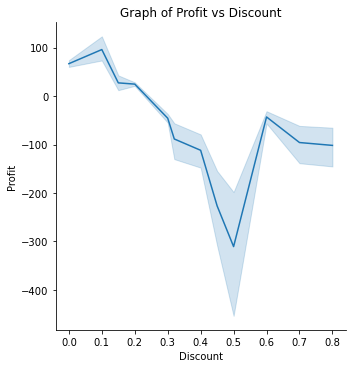

In [230]:
# Checking effect of increasing Discount on Profit
sns.relplot(x = "Discount",y = "Profit",data = df,kind = 'line')
plt.title('Graph of Profit vs Discount')
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

Above graph shows that if Discount is increasing than Profit is decreasing. So, there is a negative relationship between Discount and Profit

### 3) Exploring Sales feature

/Users/nitinyadav/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


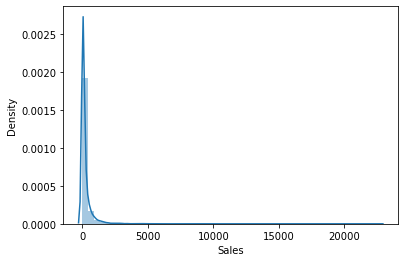

In [214]:
# What range of sales is performed in most sales operations
sns.distplot(df['Sales'])
plt.show()

Above histogram shows that most of sales operations are performed near to zero Sales

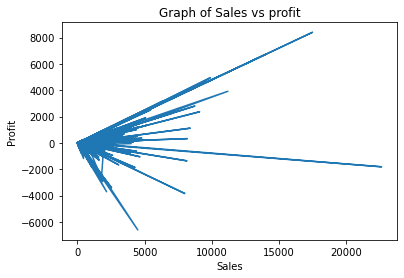

In [220]:
# Checking effect of increasing Sales on Profit
plt.plot(df["Sales"], df["Profit"])
plt.title('Graph of Sales vs profit')
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

Above graph shows that if Sales is increased, Profit can increase as well as decrease . So, there is an arbitrary relationship between Sales and Profit

## Conclusion

Following changes in variables can generate more Profit:
* **Discount**: Limit discount from 0% to 10%
* **Quantity**: Quantity of items should be in between 1 to 11
* **Sales**: Increase Sales to make more profit, but must keep other factors in mind else loss can also happen
* **Region**: Reduce sales operations in Central region, as it generates very less profit
* **Cities & States**: There are 116 Cities and 10 States which generates loss. So, reduce sales operations in these Cities and States
* **Category**: Increase the sales of things which come under Technology Category
* **Sub-Category**: Increase the sales of things which comes under Copiers Sub-Category
* **Segment**: Choose Home Office Segment to generate more profit